# Project: Supervised Learning - Personal Loan Campaign Modelling

Cory Melendez

UT AIML PGP

7/9/2020

Repo: https://github.com/cmelende/Project2.git

## 1. Import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation. (5 marks)

### Import libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_boston
from scipy import stats
import numpy as np

### Import dataset

In [6]:
customer_df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
customer_df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

### Check datatypes

In [7]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


### Statistical Summary

In [8]:
customer_df.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

### Shape

In [9]:
customer_df_column_count = customer_df.shape[0]
customer_df_row_count = customer_df.shape[1]

print("shape of the customer dataset: ", customer_df.shape)
print("number of rows: ", customer_df_row_count)
print("number of columns: ", customer_df_column_count)

shape of the customer dataset:  (5000, 14)
number of rows:  14
number of columns:  5000


### Null values or imputational values
Since all columns are of type int or float and all of the columns are non nullable, we can see that there is a null total count of zero across all columns
However, we want to check if any values are NaN

In [67]:
customer_df_column_null_count = customer_df.isnull().sum()
customer_df_total_null_count = customer_df_column_null_count.sum()
customer_df_column_nan_count = customer_df.isna

print("null value count across columns: \n", customer_df_column_null_count)
print()
print("total null count of all columns: ", customer_df_total_null_count)


null value count across columns: 
 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

total null count of all columns:  0


In [11]:
customer_df_column_nan_count = customer_df.isna().sum()
customer_df_total_nan_count = customer_df_column_nan_count.sum()

print("values that are non numbers across all columns:\n", customer_df_column_nan_count)
print("total non number values across all columns: ", customer_df_total_nan_count)

values that are non numbers across all columns:
 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64
total non number values across all columns:  0


### Check to to see if the 'bool' columns have valid values, since typically most programming languages treat zero as false and anything positive as true, we'll do the same. We see no values that are negative so no need to cleanup

In [12]:
customer_df_bool_column_names = ['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
customer_df_column_names = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
def get_count_bad_bool_values(df, bool_column_names):
    counter = 0
    for column in bool_column_names:
        null_df = df.loc[(df[column] < 0)]
        count = null_df.shape[0]
        counter += count
    
    return counter

In [13]:
bad_bool_count = get_count_bad_bool_values(customer_df, customer_df_bool_column_names)
print("counnt of bad bools: ", bad_bool_count)

counnt of bad bools:  0


In [14]:
customer_df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

### Check the following:
* any age values are bad - we'll assume that anybody under 18 is a bad value
* any experience is less than 0
* any income is less than 0
* number of family members is less than 1
* education value not in [ [1,2,3] ]

We have some possible bad values for experience, there are several rows with a negative value 

In [15]:
customers_underage_count = customer_df.loc[(customer_df['Age']) < 18].shape[0]
customers_bad_exp_count = customer_df.loc[(customer_df['Experience']) < 0].shape[0]
customers_bad_income_count = customer_df.loc[(customer_df['Income']) < 0].shape[0]
customer_bad_family_member_count = customer_df.loc[(customer_df['Family']) < 1].shape[0]
customer_bad_education_value_count = customer_df.loc[~customer_df['Education'].isin([1,2,3])].shape[0]

print("bad age value count: ", customers_underage_count)
print("bad experience value count: ", customers_bad_exp_count)
print("bad income value count: ", customers_bad_income_count)
print("bad family member value count: ", customer_bad_family_member_count)
print("bad education value count: ", customer_bad_education_value_count)



bad age value count:  0
bad experience value count:  52
bad income value count:  0
bad family member value count:  0
bad education value count:  0


## 2. EDA:  Study  the  data  distribution  in  each  attribute  and  target  variable,  share  your  findings (20 marks)
* Number of unique in each column?
* Numberof people with zero mortgage?
* Number of people with zero credit card spending per month?
* Value counts of all categorical columns.
* Univariate and Bivariate
* Get data model ready

In [16]:
def get_unique_column_counts(df, column_names):
    countList = list()
    for column in column_names:
        count = df[column].unique().shape[0]
        countList.append(UniqueColumnCount(column, count))
    return countList

def print_unique_columns_counts(unique_column_counts):
    for unique_column_count in unique_column_counts:
        unique_column_count.print_msg()

class UniqueColumnCount: 
    def __init__(self, column_name, column_count):
        self.column_name = column_name
        self.column_count = column_count
    
    def print_msg(self):
        print(f'Number of unique values in {self.column_name}: {self.column_count}')

### Number of unique in each column

In [17]:
unique_column_counts = get_unique_column_counts(customer_df, customer_df_column_names)
print_unique_columns_counts(unique_column_counts)

Number of unique values in Age: 45
Number of unique values in Experience: 47
Number of unique values in Income: 162
Number of unique values in ZIP Code: 467
Number of unique values in Family: 4
Number of unique values in CCAvg: 108
Number of unique values in Education: 3
Number of unique values in Mortgage: 347
Number of unique values in Personal Loan: 2
Number of unique values in Securities Account: 2
Number of unique values in CD Account: 2
Number of unique values in Online: 2
Number of unique values in CreditCard: 2


### Number of people with zero mortgage?


In [18]:
customers_zero_mortgage_df = customer_df.loc[customer_df['Mortgage'] == 0]
print("number of customers with zero mortgage: ", customers_zero_mortgage_df.shape[0])

number of customers with zero mortgage:  3462


### Number of people with zero credit card spending per month?

In [19]:
customers_zero_cc_spending_df = customer_df.loc[customer_df["CCAvg"] == 0]
print("number of customers with zero credit card spending: ", customers_zero_cc_spending_df.shape[0])

number of customers with zero credit card spending:  106


### Value counts of all categorical columns

In [20]:
def print_categorical_dict(dict, map):
    for key,val in dict.items():
        readable_value = map[key]
        print(f'{readable_value}: {val}')

categorical_column_names = ['Education']
education_value_readable_map = {
    1: "Undergrad",
    2: "Graduate",
    3: "Advanced/Professional"
}

In [21]:
education_dict = customer_df['Education'].value_counts().to_dict()
print_categorical_dict(education_dict, education_value_readable_map)

Undergrad: 2096
Advanced/Professional: 1501
Graduate: 1403


### Univariate Plots

### Summary: 

### Age: has a a pretty even distribution, there doenst seem to be an apparent relationship, ie: we have more more data points for older people than younger people. However, like a bell curve, they do drop off towards the beginning and end.

### Experience: Like age, the distribution seems pretty even, though near the 10, 20, 30, 40 marks, there seems to always be a dropoff comapred to the rest of the bins

### Income: Higher incomes are much more rarer, and most of the data points seem sto happen around the 25 to 100k mark. The bell curve is shifted more towards the lower income brackets

### ZIP Code: Zip codes are concentrated towards the end, which by the nature of zip codes probably means that the people that are most likely to do business with our bank are the people who live in a specific area (where our bank is located)

###  Family: There is almost a downwards trend, as the family member number grows, the count goes down as well, except for the number 4, which seems to go back up. 

### CCAvg: This look graph looks a lot like our income graph, there may be a relationship between our credit card spending and income, ie: the less a person's income is, the more they are likely to spend

### Education: Undergrad is seen the most, followed by adv/pro and not far behind, graduate. Not much to be said otherwise.

### Mortgage: Again, this graph looks a lot like our income and credit card spending graph, with most of the data points being just above the 0 mark. So there may be a relationship between income/credit card spending and the mortgage value.

### Personal Loan: There were far more people that did not have a personal loan than the people who did have a personal loan
### Securities Account: Like above, there are far more people without a securities account than there are with one

### CD Account: Far more people do not have a CD account than those with one

### Online: Theres about 20% more people with an online account there is not without one

### CreditCard: There a a lot of people with credit cards than those without one

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

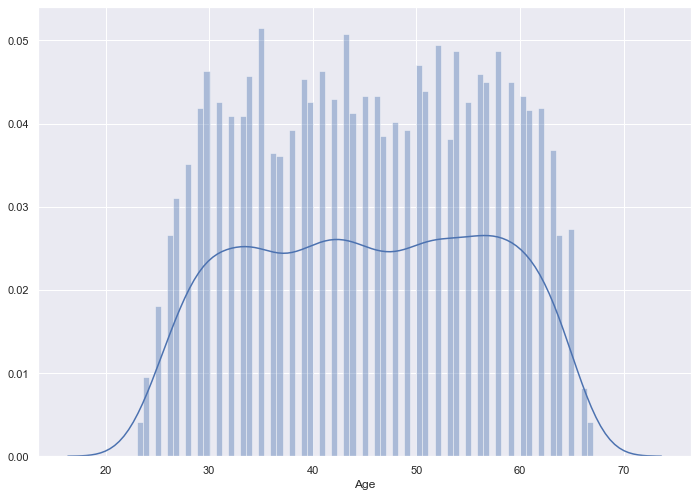

In [23]:
sns.distplot(customer_df['Age'], bins=75);

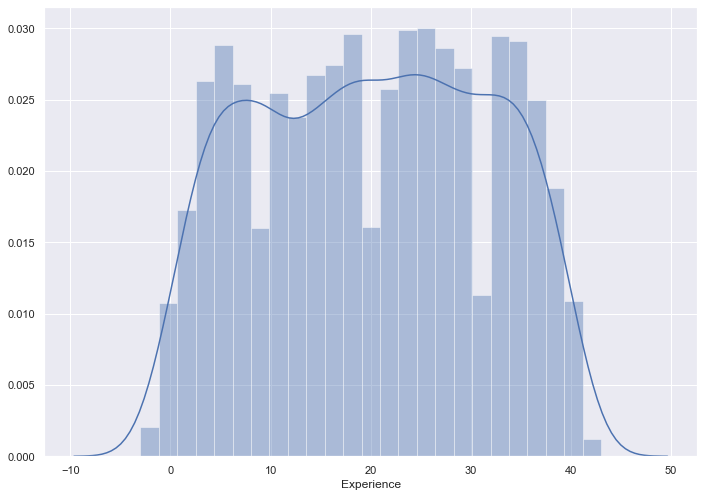

In [24]:
sns.distplot(customer_df['Experience'], bins=25);

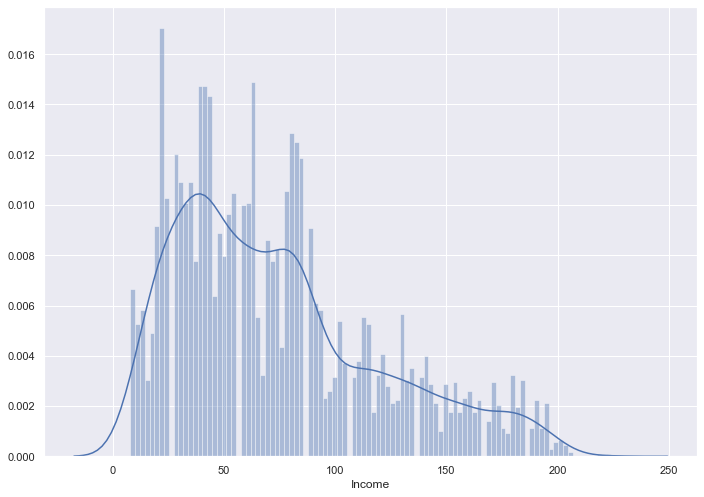

In [25]:
sns.distplot(customer_df['Income'], bins=100);

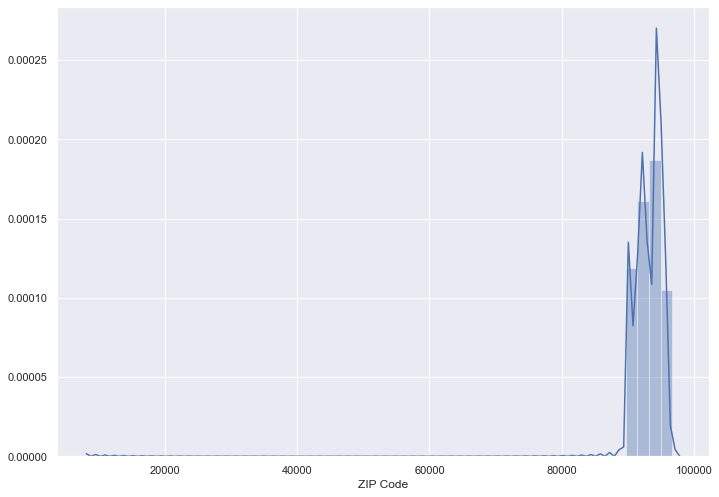

In [26]:
sns.distplot(customer_df['ZIP Code'])

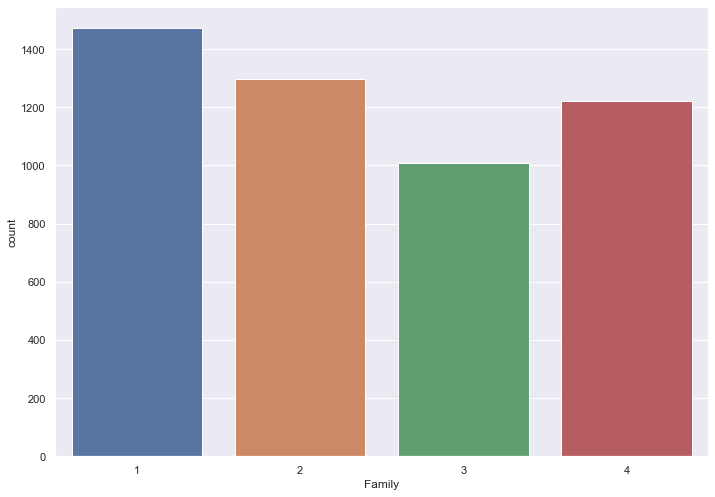

In [27]:
sns.countplot(x="Family", data=customer_df)

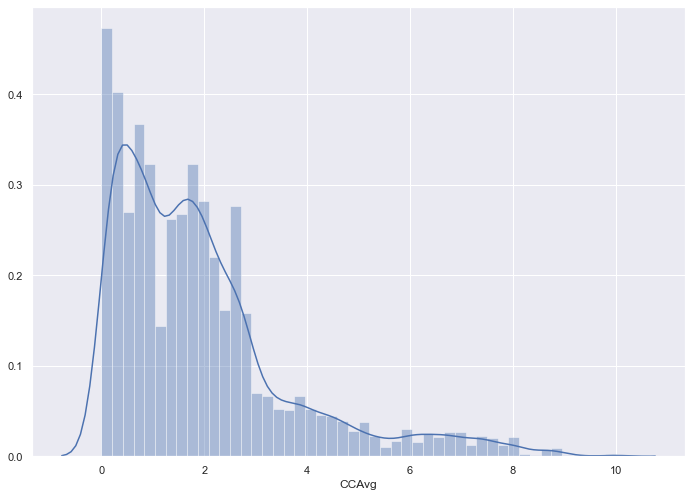

In [28]:
sns.distplot(customer_df['CCAvg'])

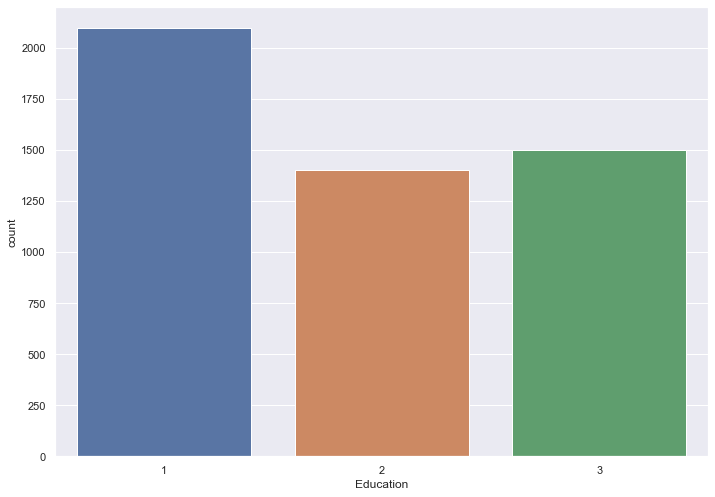

In [29]:
sns.countplot(x="Education", data=customer_df)


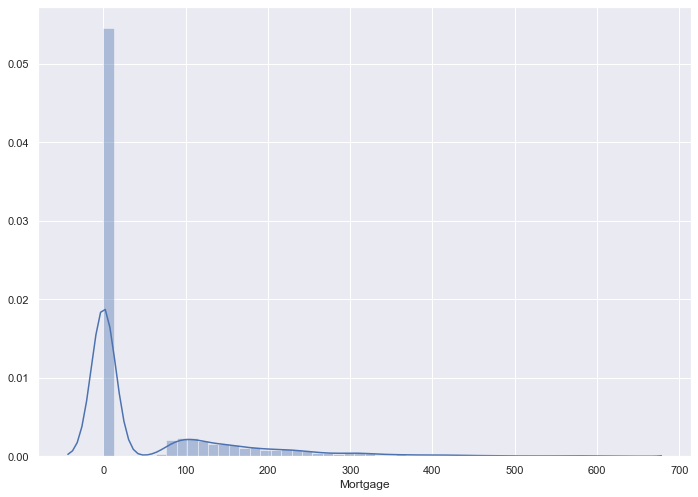

In [30]:
sns.distplot(customer_df['Mortgage'])

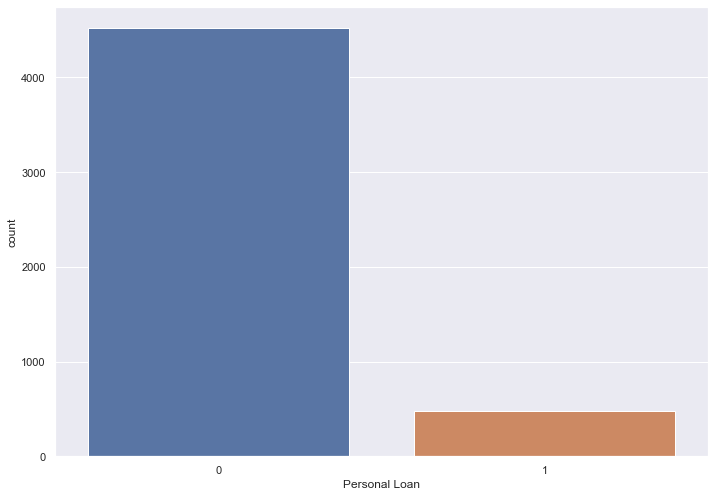

In [31]:
sns.countplot(x="Personal Loan", data=customer_df)

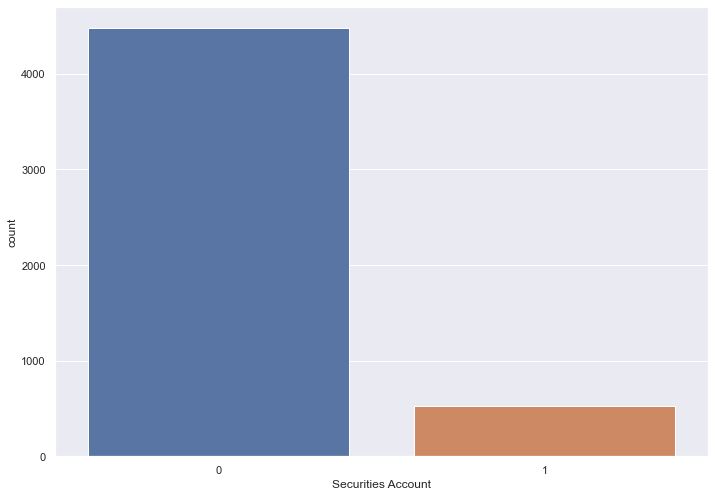

In [32]:
sns.countplot(x="Securities Account", data=customer_df)

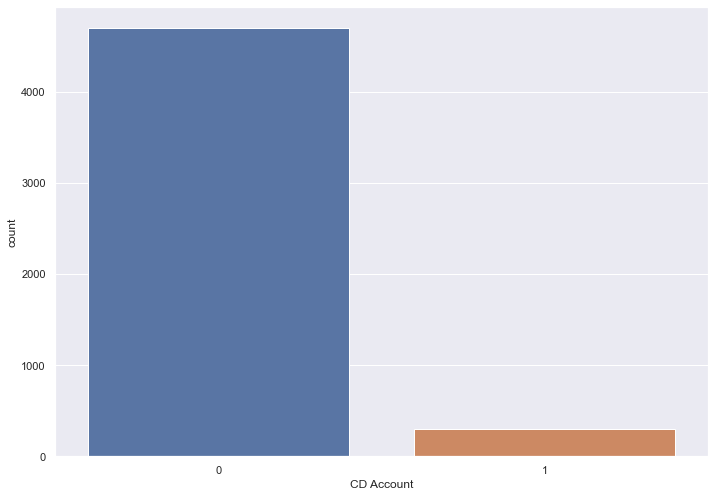

In [33]:
sns.countplot(x="CD Account", data=customer_df)

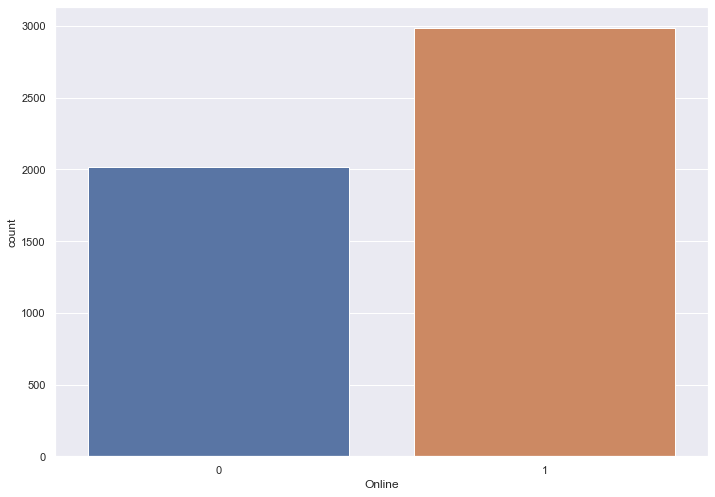

In [34]:
sns.countplot(x="Online", data=customer_df)

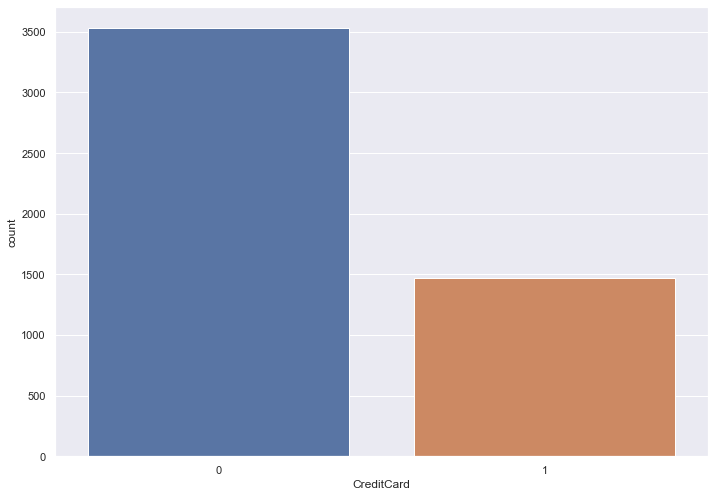

In [35]:
sns.countplot(x="CreditCard", data=customer_df)

### Bivariate
We'll now plot each attribute (save 'ID' and 'Personal Loan') to see the relationship between that attribute and whether or not the customer had a personal loan (target variable) to see if there is any relationship

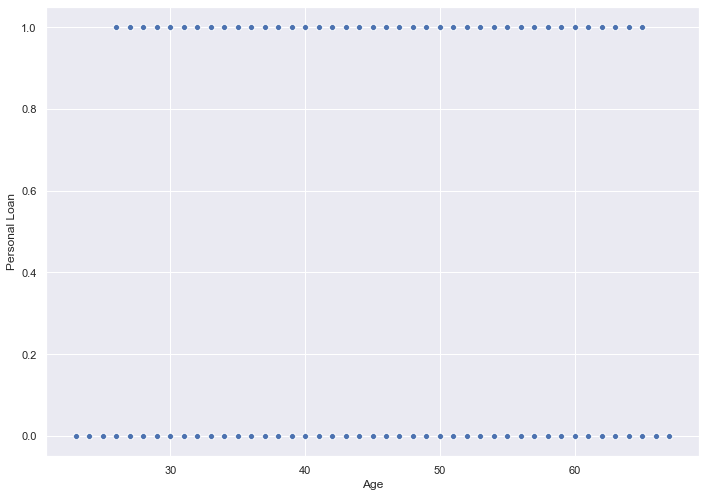

In [36]:
sns.scatterplot(customer_df['Age'], customer_df['Personal Loan'])  # Plots the scatter plot using two variables

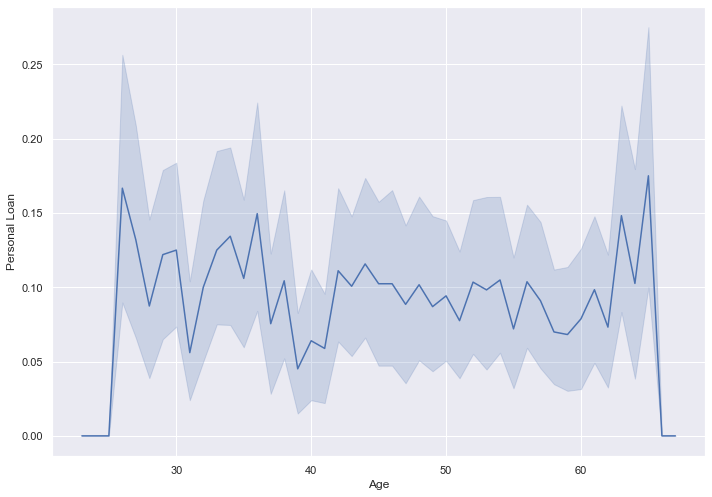

In [37]:
sns.lineplot(x='Age', y='Personal Loan', data=customer_df)  # Plots the scatter plot using two variables

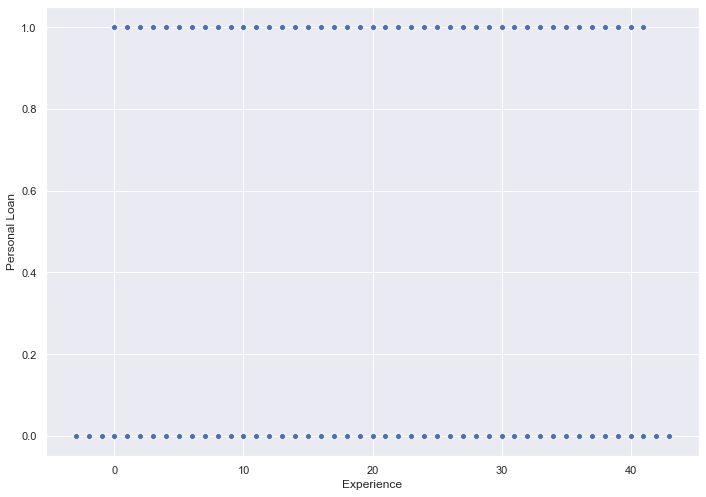

In [38]:
sns.scatterplot(customer_df['Experience'], customer_df['Personal Loan'])  # Plots the scatter plot using two variables

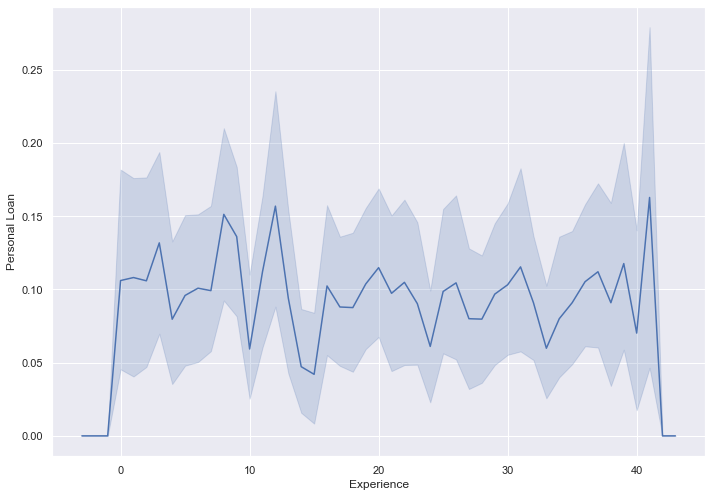

In [39]:
sns.lineplot(x='Experience', y='Personal Loan', data=customer_df)  # Plots the scatter plot using two variables

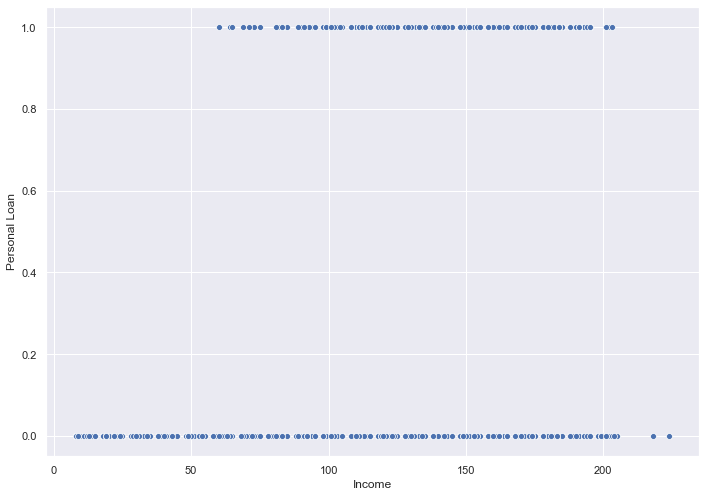

In [40]:
sns.scatterplot(customer_df['Income'], customer_df['Personal Loan'])  # Plots the scatter plot using two variables

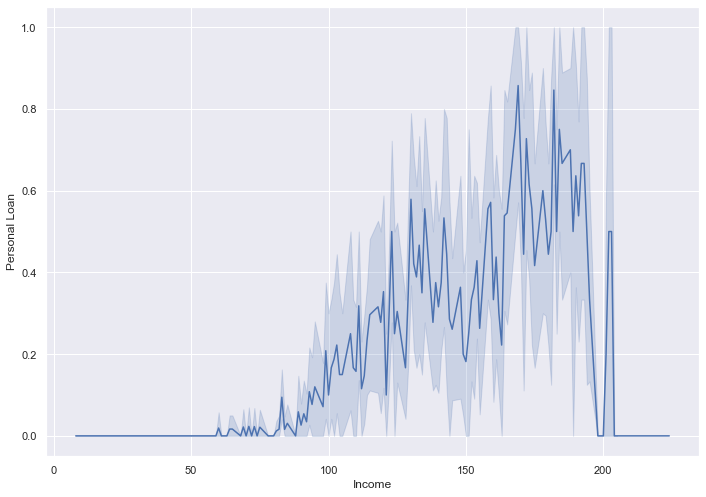

In [41]:
sns.lineplot(x='Income', y='Personal Loan', data=customer_df)  # Plots the scatter plot using two variables

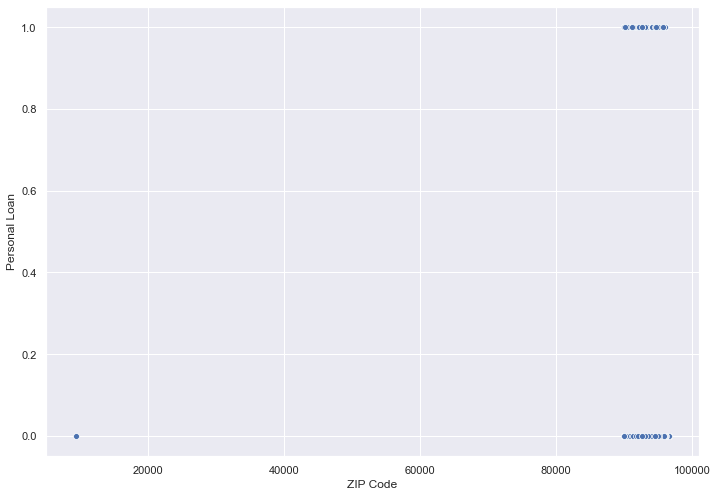

In [42]:
sns.scatterplot(customer_df['ZIP Code'], customer_df['Personal Loan'])  # Plots the scatter plot using two variables

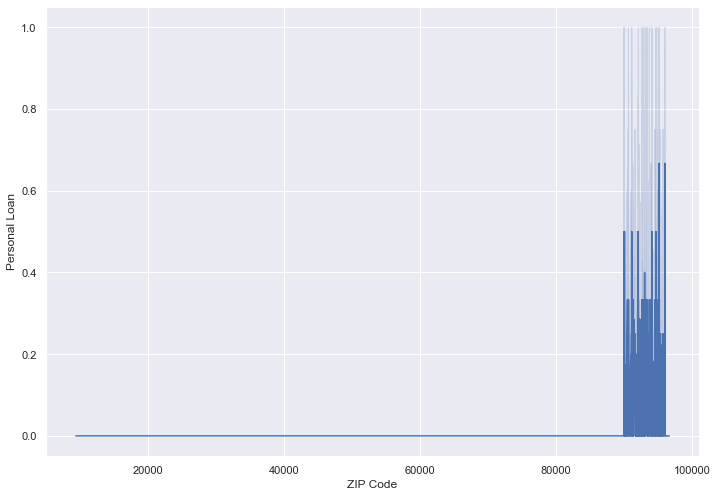

In [43]:
sns.lineplot(x='ZIP Code', y='Personal Loan', data=customer_df)  

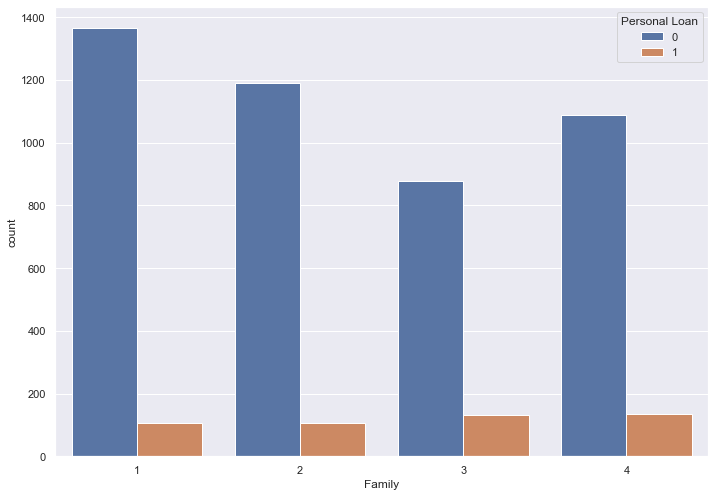

In [44]:
sns.countplot(x="Family", hue="Personal Loan", data=customer_df)

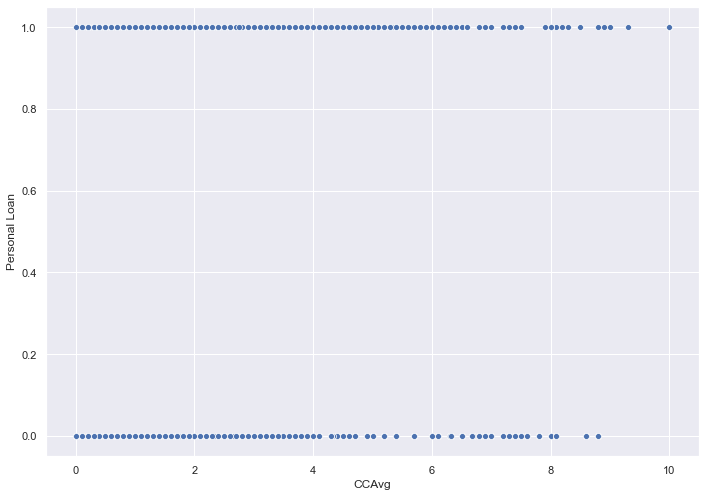

In [45]:
sns.scatterplot(customer_df['CCAvg'], customer_df['Personal Loan'])  # Plots the scatter plot using two variables

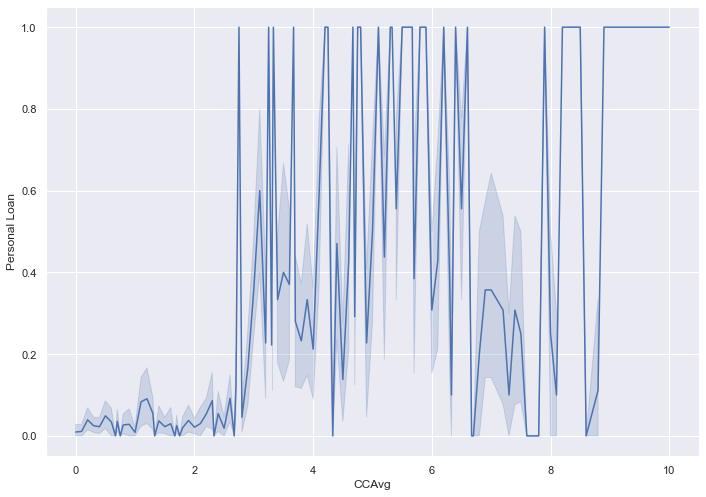

In [46]:
sns.lineplot(x='CCAvg', y='Personal Loan', data=customer_df)  

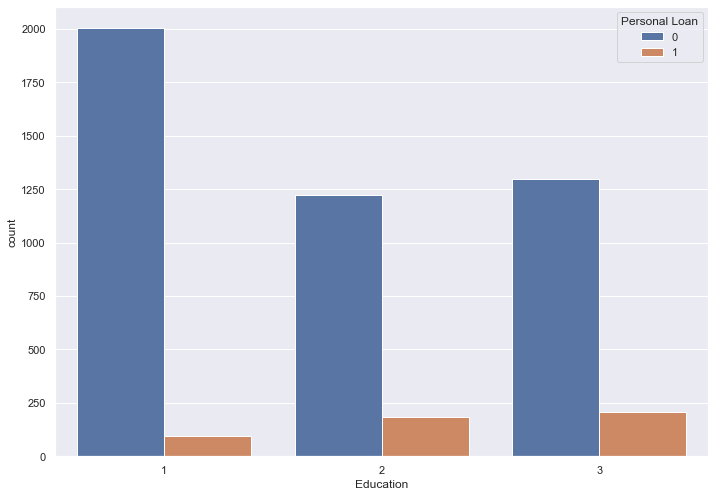

In [47]:
sns.countplot(x="Education", hue="Personal Loan", data=customer_df)

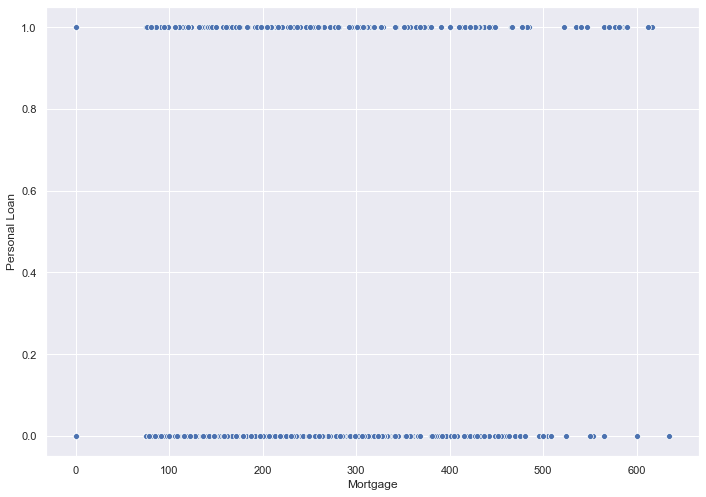

In [48]:
sns.scatterplot(customer_df['Mortgage'], customer_df['Personal Loan'])  # Plots the scatter plot using two variables

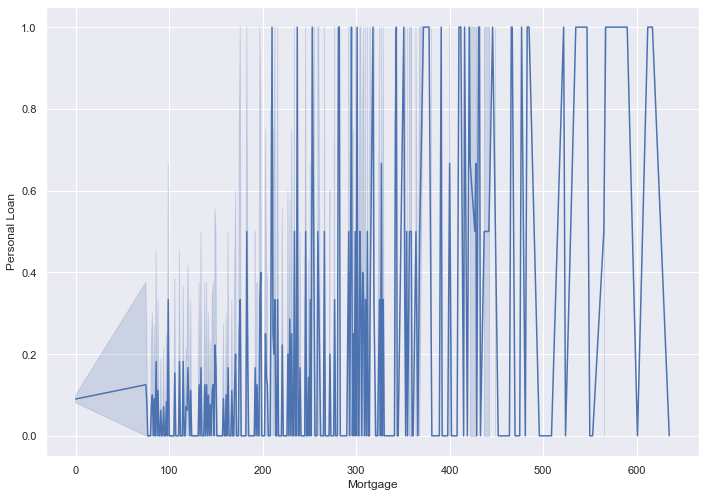

In [49]:
sns.lineplot(x='Mortgage', y='Personal Loan', data=customer_df)  

In [ ]:
sns.countplot(x="Securities Account", hue="Personal Loan", data=customer_df)

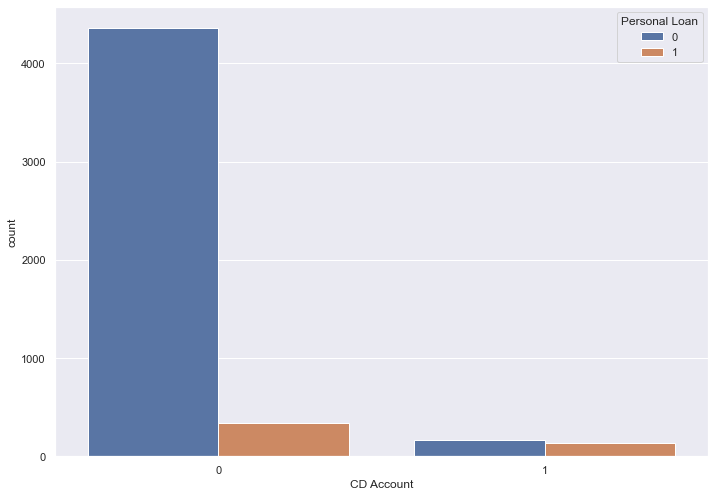

In [52]:
sns.countplot(x="CD Account", hue="Personal Loan", data=customer_df)

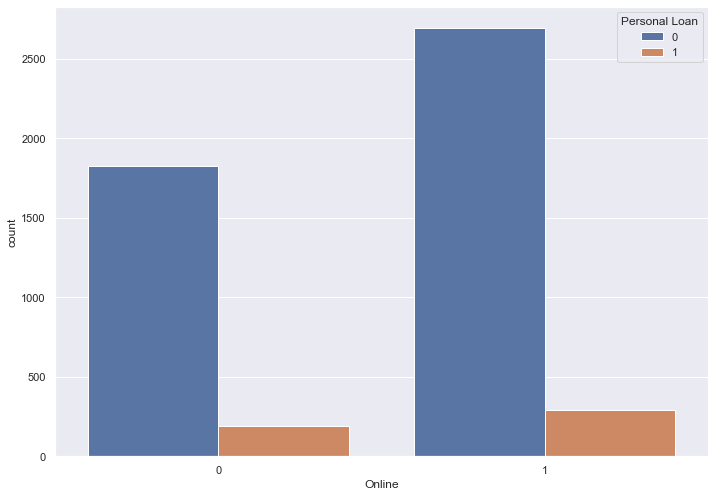

In [53]:
sns.countplot(x="Online", hue="Personal Loan", data=customer_df)

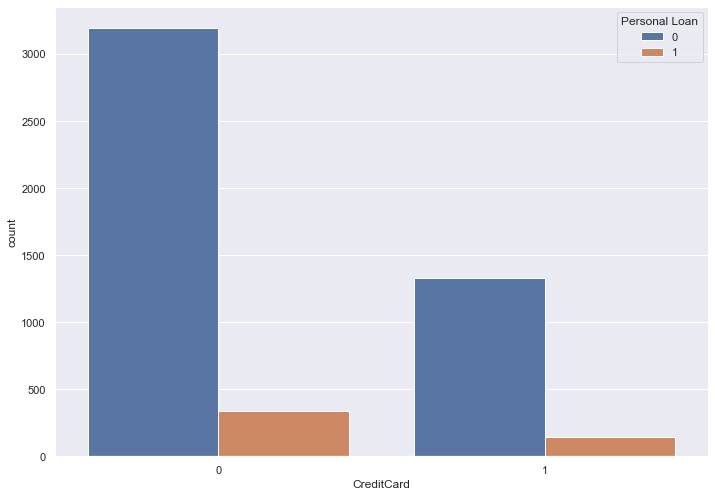

In [54]:
sns.countplot(x="CreditCard", hue="Personal Loan", data=customer_df)

In [55]:
customer_df.corr()

ID       Age  Experience    Income  ZIP Code  \
ID                  1.000000 -0.008473   -0.008326 -0.017695  0.013432   
Age                -0.008473  1.000000    0.994215 -0.055269 -0.029216   
Experience         -0.008326  0.994215    1.000000 -0.046574 -0.028626   
Income             -0.017695 -0.055269   -0.046574  1.000000 -0.016410   
ZIP Code            0.013432 -0.029216   -0.028626 -0.016410  1.000000   
Family             -0.016797 -0.046418   -0.052563 -0.157501  0.011778   
CCAvg              -0.024675 -0.052012   -0.050077  0.645984 -0.004061   
Education           0.021463  0.041334    0.013152 -0.187524 -0.017377   
Mortgage           -0.013920 -0.012539   -0.010582  0.206806  0.007383   
Personal Loan      -0.024801 -0.007726   -0.007413  0.502462  0.000107   
Securities Account -0.016972 -0.000436   -0.001232 -0.002616  0.004704   
CD Account         -0.006909  0.008043    0.010353  0.169738  0.019972   
Online             -0.002528  0.013702    0.013898  0.014206  0.016990   
CreditCard          0.017028  0.007681    0.008967 -0.002385  0.007691   

                      Family     CCAvg  Education  Mortgage  Personal Loan  \
ID                 -0.016797 -0.024675   0.021463 -0.013920      -0.024801   
Age                -0.046418 -0.052012   0.041334 -0.012539      -0.007726   
Experience         -0.052563 -0.050077   0.013152 -0.010582      -0.007413   
Income             -0.157501  0.645984  -0.187524  0.206806       0.502462   
ZIP Code            0.011778 -0.004061  -0.017377  0.007383       0.000107   
Family              1.000000 -0.109275   0.064929 -0.020445       0.061367   
CCAvg              -0.109275  1.000000  -0.136124  0.109905       0.366889   
Education           0.064929 -0.136124   1.000000 -0.033327       0.136722   
Mortgage           -0.020445  0.109905  -0.033327  1.000000       0.142095   
Personal Loan       0.061367  0.366889   0.136722  0.142095       1.000000   
Securities Account  0.019994  0.015086  -0.010812 -0.005411       0.021954   
CD Account          0.014110  0.136534   0.013934  0.089311       0.316355   
Online              0.010354 -0.003611  -0.015004 -0.005995       0.006278   
CreditCard          0.011588 -0.006689  -0.011014 -0.007231       0.002802   

                    Securities Account  CD Account    Online  CreditCard  
ID                           -0.016972   -0.006909 -0.002528    0.017028  
Age                          -0.000436    0.008043  0.013702    0.007681  
Experience                   -0.001232    0.010353  0.013898    0.008967  
Income                       -0.002616    0.169738  0.014206   -0.002385  
ZIP Code                      0.004704    0.019972  0.016990    0.007691  
Family                        0.019994    0.014110  0.010354    0.011588  
CCAvg                         0.015086    0.136534 -0.003611   -0.006689  
Education                    -0.010812    0.013934 -0.015004   -0.011014  
Mortgage                     -0.005411    0.089311 -0.005995   -0.007231  
Personal Loan                 0.021954    0.316355  0.006278    0.002802  
Securities Account            1.000000    0.317034  0.012627   -0.015028  
CD Account                    0.317034    1.000000  0.175880    0.278644  
Online                        0.012627    0.175880  1.000000    0.004210  
CreditCard                   -0.015028    0.278644  0.004210    1.000000

### Summary: 
### Age
Graph Analysis: As you'll see with experience, it looks like younger a person is the more likely they are to have a persona loan than older people, however when you get to the oldest people, you see a spike. 

Correlation: This is supported by the correlation grid above, there is a negative correlation between age and whether or not the person has a personal loan

### Experience 
Graph Analysis: There seems to be a trend where at about the 10 year mark, there is an increased ratio of people with personal loans than people with non personal loans. And a spike toward the end of the graph where experience is the highest.

Correlation: correlation supports, just by analyzing the graph you can see that there is a slight negative relationship between experience and whether or not the person has a loan

### Income
Graph Analysis: Pretty stable relationship here, the more you earn, the more likely you are to have a personal loan.

Correlation: correlation highly supports this as well, it could be the biggest indicator on if a person will have a personal loan.

### Zip Code 
Graph Analysis: There may be a relationship between the area (zip codes around 86000) and the amount of people that have personal loans. Of course, in the count plot above, there is also just more people that do business with our bank maybe due to the fact that the bank is in there area. 

Correlation: correlation also indicates that there is not a big possibility of there being a relationship, be it negative or positive.

### Family 
Graph Analysis: 
Seems to be a slight relationship between the amount of family members and whether or not they have a personal loan. Even though 3 & 4 family member do not outnumber 1 & 2 family members, the likeliness they are to have a personal loan is a little higher. 

Correlation: correlation supports this, there could be a small positive relationship between # of family members and whether or not the person has a personal loan

### CCAVg 
Graph Analysis: 
Save for the lower values of CCAVg, the graph oscilates here so its hard to indicate just from analyzing the graph of the possiblity of a strong relationship between CCAVg and our target variable (Personal Loan). 

Correlation: correlation indicates the possiblity of there being a high relationship between CCAvg and whether or not the person has a personal loan.

### Education
Graph Analysis: Looks like there may be a relationship between a higher education value and whether or not that person has a personal loan. 

Correlation: correlation also supports this 

### Mortgage
Graph Analysis: This one oscillates as well, hard to tell if there is a relationship between Mortgage and target variable

Correlation: 

### Securities Account
Graph Analysis: Doesnt look like there is a strong relationship between Securities Account and target variable

Correlation: 

### CD Account
Graph Analysis: This one does look like it may have a stronger relationship between CD Account and target variable, almost all people that had a CD acct also had a personal loan

### Online: 
Graph Analysis: Doesnt appear to be a relationship between Online and target variable

Correlation: 

### CreditCard
Graph Analysis: Doesnt appear to be a relationship between CreditCard and target variable

Correlation: 

### Getting the Data Model Ready

Previously, massaged the data to ensure that there were no null values or values outside of the valid range 

In [56]:
customer_df_with_dummies = pd.get_dummies(customer_df)
customer_df_with_dummies.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [57]:
class LogisticRegressionAnalysis:
    def __init__(self, df, target_column):
        self.X = df.drop(target_column, axis=1)
        self.Y = df[target_column]
        self.dataframe = df
    
    def train(self, test_data_size):
        training = train_test_split(self.X, self.Y, test_size=test_data_size, random_state=1)
        self.x_train = training[0]
        self.x_test = training[1]
        self.y_train = training[2]
        self.y_test = training[3]
        print("{0:0.2f}% data is in training set".format((len(x_train)/len(self.dataframe.index)) * 100))
        print("{0:0.2f}% data is in test set".format((len(x_test)/len(self.dataframe.index)) * 100))

    def fit(self):
        self.model = LogisticRegression(solver="liblinear")
        self.model.fit(x_train, y_train)
        self.y_predict = model.predict(x_test)
        self.coef_df = pd.DataFrame(model.coef_)
        self.coef_df['intercept'] = model.intercept_
        print("coeffecients: ", coef_df)

    def print_metrics(self):
        model_score = model.score(x_test, y_test)
        print("model score: ", model_score)
        print()
        print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(self.dataframe.loc[self.dataframe['Personal Loan'] == 1]), (len(self.dataframe.loc[self.dataframe['Personal Loan'] == 1])/len(self.dataframe.index)) * 100))
        print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(self.dataframe.loc[self.dataframe['Personal Loan'] == 0]), (len(self.dataframe.loc[self.dataframe['Personal Loan'] == 0])/len(self.dataframe.index)) * 100))
        print("")
        print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
        print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
        print("")
        print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
        print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
        print("")

    def print_confusion_matrix(self):
        self.cm=metrics.confusion_matrix(self.y_test, self.y_predict, labels=[1, 0])

        selfdf_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                        columns = [i for i in ["Predict 1","Predict 0"]])
        plt.figure(figsize = (7,5))
        sns.heatmap(df_cm, annot=True)

def PrintPerformance(df):
    # drop the column we are trying to predict
    X = df.drop('Personal Loan', axis=1)
    # specify the column that we are trying to predict
    Y = df['Personal Loan']

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

    #we have a perfect split
    print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
    print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))


    model = LogisticRegression(solver="liblinear")
    model.fit(x_train, y_train)

    y_predict = model.predict(x_test)

    coef_df = pd.DataFrame(model.coef_)
    coef_df['intercept'] = model.intercept_
    print("coeffecients: ", coef_df)

    model_score = model.score(x_test, y_test)
    print("model score: ", model_score)
    print()
    print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal Loan'] == 1]), (len(df.loc[df['Personal Loan'] == 1])/len(df.index)) * 100))
    print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal Loan'] == 0]), (len(df.loc[df['Personal Loan'] == 0])/len(df.index)) * 100))
    print("")
    print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
    print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
    print("")
    print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
    print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
    print("")

    cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                    columns = [i for i in ["Predict 1","Predict 0"]])
                        
    TP = df_cm['Predict 1'][0]
    FP = df_cm['Predict 1'][1]
    FN = df_cm['Predict 0'][0]
    TN = df_cm['Predict 0'][1]   

    accuracy = (TP + TN)/(TP+TN+FP+FN)
    recall = (TP)/(TP+FN)
    precision = (TP)/(TP+FP)


    print("Accuracy:", accuracy)
    print("Precision:", recall)                 
    print("Recall:", precision)

    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True)


## 3. Split the data into training and test set in the ration of 70:30, respectively
## 4. Use Logistic regression model to predict whether the customer will take a personal loan or not
### Note: All of this work is being done in the PrintPerformance method so i can easily test different dataframes

70.00% data is in training set
30.00% data is in test set
coeffecients:            0        1         2         3         4         5         6  \
0 -0.000036 -0.00058 -0.001399  0.036103 -0.000065  0.008596  0.005785   

          7        8         9        10        11        12  intercept  
0  0.009346  0.00086  0.000303  0.002693 -0.000092 -0.000031   -0.00006  
model score:  0.908

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)

Accuracy: 0.908
Precision: 0.28859060402684567
Recall: 0.5733333333333334


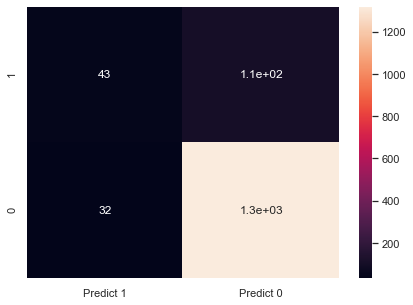

In [58]:
PrintPerformance(customer_df_with_dummies)

## 5. Give your reasoning on how can the model perform better

### I originally tried using dummy variables as I thought that may help the formula, but turns out that the model performs the same way without dummies

70.00% data is in training set
30.00% data is in test set
coeffecients:            0        1         2         3         4         5         6  \
0 -0.000036 -0.00058 -0.001399  0.036103 -0.000065  0.008596  0.005785   

          7        8         9        10        11        12  intercept  
0  0.009346  0.00086  0.000303  0.002693 -0.000092 -0.000031   -0.00006  
model score:  0.908

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)

Accuracy: 0.908
Precision: 0.28859060402684567
Recall: 0.5733333333333334


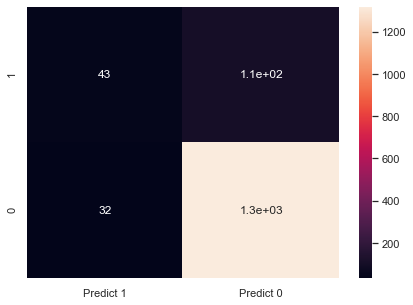

In [59]:
PrintPerformance(customer_df)

### We can start dropping some of the variables in which the correlation is near zero: 'ZIP Code', 'Online', 'CreditCard'
### Fig A

70.00% data is in training set
30.00% data is in test set
coeffecients:            0         1         2         3         4         5         6  \
0 -0.000069 -0.483018  0.481283  0.048517  0.632341  0.157847  1.663643   

          7         8         9  intercept  
0  0.000843 -0.672215  2.436476  -0.687211  
model score:  0.9453333333333334

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)

Accuracy: 0.9453333333333334
Precision: 0.5436241610738255
Recall: 0.8526315789473684


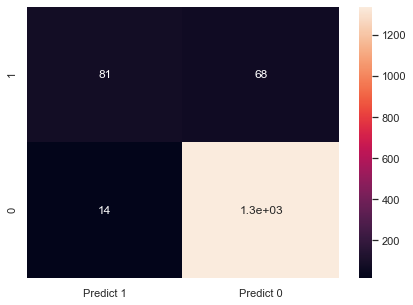

In [60]:
customer_no_zip_online_df = customer_df_with_dummies.drop('ZIP Code', axis=1).drop('Online', axis=1).drop('CreditCard', axis=1)
PrintPerformance(customer_no_zip_online_df)

89 were predicted to be true and were true (TP)

60 were predicted to be true but were false (FP)

10 were predicted to be false but were true (FN)

1351 were predicted to be and were false (TN)



### If we change the penalty parameter to 'l1' in the Logistic Regression constructor, we get the same results

In [61]:
def PrintPerformance_enh_1(df):
    # drop the column we are trying to predict
    X = df.drop('Personal Loan', axis=1)
    # specify the column that we are trying to predict
    Y = df['Personal Loan']

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

    #we have a perfect split
    print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
    print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))


    model = LogisticRegression(solver="liblinear", penalty='l1')
    model.fit(x_train, y_train)

    y_predict = model.predict(x_test)

    coef_df = pd.DataFrame(model.coef_)
    coef_df['intercept'] = model.intercept_
    print("coeffecients: ", coef_df)

    model_score = model.score(x_test, y_test)
    print("model score: ", model_score)
    print()
    print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal Loan'] == 1]), (len(df.loc[df['Personal Loan'] == 1])/len(df.index)) * 100))
    print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal Loan'] == 0]), (len(df.loc[df['Personal Loan'] == 0])/len(df.index)) * 100))
    print("")
    print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
    print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
    print("")
    print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
    print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
    print("")

    cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                    columns = [i for i in ["Predict 1","Predict 0"]])

    TP = df_cm['Predict 1'][0]
    FP = df_cm['Predict 1'][1]
    FN = df_cm['Predict 0'][0]
    TN = df_cm['Predict 0'][1]   

    accuracy = (TP + TN)/(TP+TN+FP+FN)
    recall = (TP)/(TP+FN)
    precision = (TP)/(TP+FP)


    print("Accuracy:", accuracy)
    print("Precision:", recall)                 
    print("Recall:", precision)

    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True)

70.00% data is in training set
30.00% data is in test set
coeffecients:            0         1         2         3         4         5         6  \
0 -0.000048 -0.118699  0.122457  0.050787  0.672609  0.157526  1.660997   

          7         8         9  intercept  
0  0.000811 -0.686013  2.535997 -10.382402  
model score:  0.946

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)

Accuracy: 0.946
Precision: 0.5369127516778524
Recall: 0.8695652173913043


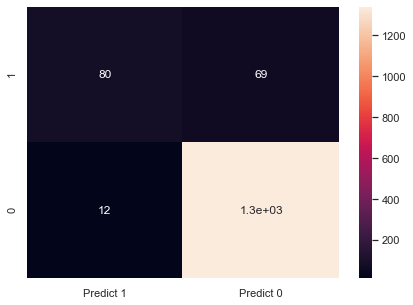

In [62]:
PrintPerformance_enh_1(customer_no_zip_online_df)

### I was curious on how offering different thresholds would change the accuracy, precision & recalls - it doesnt look like you are able to easily change this but I found a method from SO (check reference) that was able to test this. It looks like our model is using .45 which is also the highest at .946

In [63]:
def PrintPerformance_different_thresholds(df):
    # drop the column we are trying to predict
    X = df.drop('Personal Loan', axis=1)
    # specify the column that we are trying to predict
    Y = df['Personal Loan']

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

    #we have a perfect split
    print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
    print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))


    #[1]
    model = LogisticRegression(solver="liblinear")
    model.fit(x_train, y_train)

    pred_proba_df = pd.DataFrame(model.predict_proba(x_test))
    threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
    for i in threshold_list:
        print ('\n******** For i = {} ******'.format(i))
        Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
        test_accuracy = metrics.accuracy_score(y_test.to_numpy().reshape(y_test.to_numpy().size,1),
                                            Y_test_pred.iloc[:,1].to_numpy().reshape(Y_test_pred.iloc[:,1].to_numpy().size,1))

        cm = metrics.confusion_matrix(y_test.to_numpy().reshape(y_test.to_numpy().size,1), Y_test_pred.iloc[:,1].to_numpy().reshape(Y_test_pred.iloc[:,1].to_numpy().size,1))

        df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                    columns = [i for i in ["Predict 1","Predict 0"]])

        TP = df_cm['Predict 1'][0]
        FP = df_cm['Predict 1'][1]
        FN = df_cm['Predict 0'][0]
        TN = df_cm['Predict 0'][1]   

        accuracy = (TP + TN)/(TP+TN+FP+FN)
        recall = (TP)/(TP+FN)
        precision = (TP)/(TP+FP)


        print("Accuracy:", accuracy)
        print("Precision:", recall)                 
        print("Recall:", precision)
        # print(metrics.confusion_matrix(y_test.to_numpy().reshape(y_test.to_numpy().size,1),
        #                     Y_test_pred.iloc[:,1].to_numpy().reshape(Y_test_pred.iloc[:,1].to_numpy().size,1)))

In [64]:
PrintPerformance_different_thresholds(customer_no_zip_online_df)

70.00% data is in training set
30.00% data is in test set

******** For i = 0.05 ******
Accuracy: 0.836
Precision: 0.8267949666913398
Recall: 0.9893711248892826

******** For i = 0.1 ******
Accuracy: 0.892
Precision: 0.8934122871946706
Recall: 0.9853061224489796

******** For i = 0.15 ******
Accuracy: 0.9113333333333333
Precision: 0.9222797927461139
Recall: 0.978021978021978

******** For i = 0.2 ******
Accuracy: 0.918
Precision: 0.9378238341968912
Recall: 0.9701378254211332

******** For i = 0.25 ******
Accuracy: 0.9326666666666666
Precision: 0.9563286454478165
Recall: 0.9685157421289355

******** For i = 0.3 ******
Accuracy: 0.9346666666666666
Precision: 0.9659511472982976
Recall: 0.9616801768607222

******** For i = 0.35 ******
Accuracy: 0.9406666666666667
Precision: 0.9748334566987417
Recall: 0.9599125364431487

******** For i = 0.4 ******
Accuracy: 0.9446666666666667
Precision: 0.9807549962990377
Recall: 0.9587554269175108

******** For i = 0.45 ******
Accuracy: 0.946
Precision: 0

## 6. Give business understanding of your model


### Since our problem is what customers to target the marketing campaigns to, figuring out what model (and threshold) we want to use will largely depend on the cost associated with the cost of marketing to any one individual. 

### If our marketing costs are high, then we will want to make sure that our Precision is high and try to target only the customers that are basically guaranteed to sign up for a personal loan

### If our marketing costs are low, then we can priortize Recall, as marketing to more people (and getting more FP's) is generally not going to cost us as much. 

### To find the sweet spot of Accuracy, Precision, & Recall, we may want to ask the bank the money that they make off of personal loans and get the cost of marketing to any single person. From there we can calculate what accuracy, Precision, and Recall we want and try to gain as much money as possible for the bank.

In [65]:
### References:
### [1]: https://stackoverflow.com/questions/28716241/controlling-the-threshold-in-logistic-regression-in-scikit-learn